\setlength{\parindent}{0pt}  

**Christopher Wilbar**  
**MSDS_422-DL_SEC55**  
**Assignment 1: Exploring and Visualizing Data**

## 1. Summary and Problem Definition  


**Problem Definition:**   

Explore 2016 MSPA Sruvey to help guide future choices for the Data Science program regarding which programming softwares are emphasized in current courses and determine interest in potential new courses for the data science curriculum.   
    

   
**Summary**:   

Basic exploratory analysis was conducted on software system preference variables and future class interest variables to identify patterns. There were 207 valid responses returned, with 40 different features present in the data. Initial analysis suggests that Python and R are the preferred software tools across personal preferences, professsional need, and industry standards. Additionally, there is strong interest in a Pyhton for Data Analysis Course with moderate interest in the other three classes proposed. There did not appear to be much of a difference across the program, with results relatively the same. Future analysis suggests Standard or MinMaxScaling can be performed on Courses Completed though a log transformation might be appropriate for the ranking features.

## 2. Results and Recommendations

**Results and Recomendations**  
1. There is a strong preference for R and Python over other languages across different levels of courses completed.
2. Courses should be designed to incorporate Pyhton and R as much as possible, while removing any focus on Java based languages.
3. The Python for Data Analysis Course should be adopted to help with this need/desire immediately.
4. Future analysis should revisit if separate R course is needed/desired as well.

## 3. Research Design and Methods Used

**Research Design**  
A survey was given to all current students in the MSPA program. It consisted of 15 questions. All current students received the survey and a non-random sample was collected of only those that had valid responses. Data was coded in to an excel CSV file with 40 different features. Python was used to perform initial exploratory analysis to generate insights in to the distribution of the data.

**Methods Used**  
Pyhton v.3 Jupyter Notebook was created to perform the analysis.
The following packages were used:
pandas, numpy, matplotlip.pyplot, seaborn  
  
Basic pyhton descriptive statisitcs were generated.  
  
The following plots were created:  
Histogram, Scatterplot, Bar Plot, Correlation Chart


## 4. Programming Work


In [1]:
# First we import all packages that will be needed in this analysis
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [2]:
# read in comma-delimited text file, creating a pandas DataFrame object
valid_survey_input = pd.read_csv('mspa-survey-data.csv')
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [3]:
# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 

print('\nNumber of Features =', valid_survey_input.shape[1])



Contents of initial survey data ---------------

Number of Respondents = 207

Number of Features = 40


In [4]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)
# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')
              Personal_JavaScalaSpark  Personal_JavaScriptHTMLCSS  \
RespondentID                                            

In [5]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'Python_Course_Interest': 'Python',
    'Foundations_DE_Course_Interest': 'Foundations_DE',
    'Analytics_App_Course_Interest': 'Analytics_App',
    'Systems_Analysis_Course_Interest': 'Systems_Analysis'
})

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']

# Define subset DataFrame for analysis of future class preferences
class_df = survey_df.loc[:, 'Python':'Systems_Analysis']

In [6]:
#Explore Descriptive Statsitics of Data
# Descriptive statistics for courses completed to understand distribution of those taking survey
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())

#Show number of students by Expected Graudation Date
print('\nNumber of Students for Each Graduation Date ----------------')
print(valid_survey_input.Graduate_Date.value_counts(dropna = False))

#Descriptive Statistics for question 1 in Survey:
    #Distribute 100 points across the five software options based on your desire to learn each language or software system.
print('\nDescriptive statistics for personal desire to learn each language or software system-------------')
print(software_df.loc[:,'My_Java':'My_SAS'].describe())

#Descriptive Statistics for question 2 in Survey:
    #Distribute 100 points across the five options based on your professional need to learn each language or software system.
print('\nDescriptive statistics for professional need to learn each language or software system-------------')
print(software_df.loc[:,'Prof_Java':'Prof_SAS'].describe())

#Descriptive Statistics for question 3 in Survey:
    #3. Distribute 100 points across the five options based on how you see their importance and prevalence in your industry.
print('\nDescriptive statistics for industry prevelance for each language or software system-------------')
print(software_df.loc[:,'Ind_Java':'Ind_SAS'].describe())

#Desciptive Statisitcs for Class Interests - Questions 5-8
#     Use this slider to indicate your level of interest in this course. (0 means there is no chance of your including
#     this course as part of your curriculum. 100 means that you would certainly include this course in your
#     curriculum.)
print('\nDescriptive statistics for interest in each possible future course-------------')
print(class_df.describe())


Descriptive statistics for courses completed ---------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64

Number of Students for Each Graduation Date ----------------
Spring 2018      30
Winter 2018      25
Winter 2017      25
Fall 2018        20
Spring 2017      19
Fall 2017        14
Summer 2017      14
Fall 2016        13
Winter 2019      11
Summer 2018      11
Spring 2019       9
Fall 2019         5
2020 or Later     5
Summer 2019       3
NaN               3
Name: Graduate_Date, dtype: int64

Descriptive statistics for personal desire to learn each language or software system-------------
          My_Java       My_JS   My_Python        My_R      My_SAS
count  207.000000  207.000000  207.000000  207.000000  207.000000
mean    10.135266    4.797101   31.304348   37.125604   16.637681
std     11.383477    6.757764   15.570982   1

The descriptive statistics for software preference suggest that personal, professional, and industry preferences are all relatively aligned, with a slightly higher average personal preference for R and Python compared to Professional Need and Industry Standard.

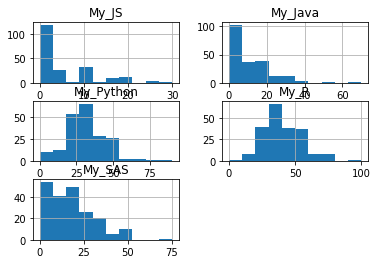

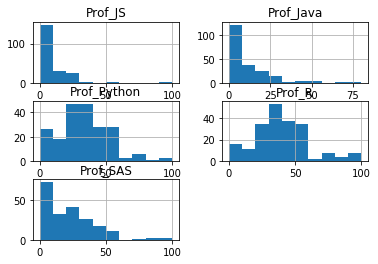

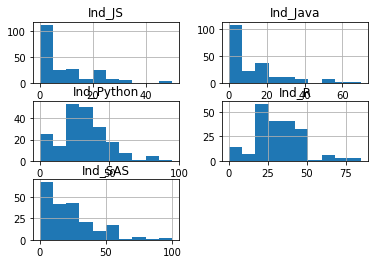

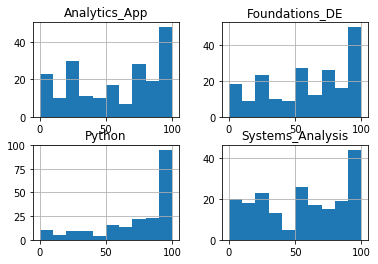

In [7]:
#Generate Histograms for Numerical Data
%matplotlib inline
software_df.loc[:,'My_Java':'My_SAS'].hist()
plt.show()

software_df.loc[:,'Prof_Java':'Prof_SAS'].hist()
plt.show()

software_df.loc[:,'Ind_Java':'Ind_SAS'].hist()
plt.show()

class_df.hist()
plt.show()

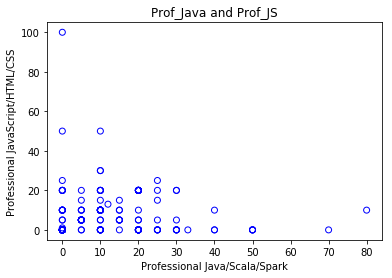

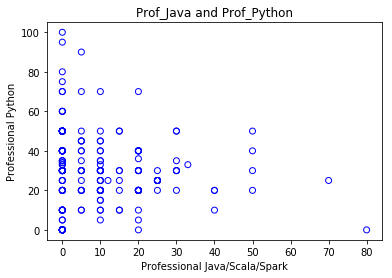

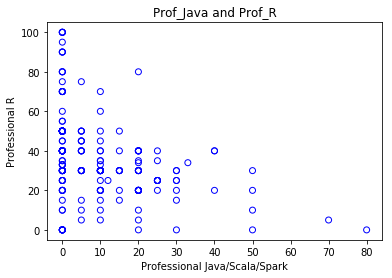

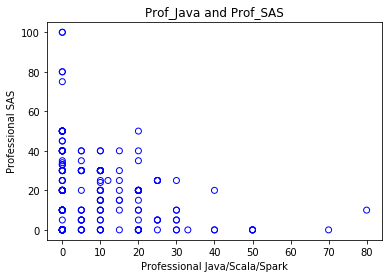

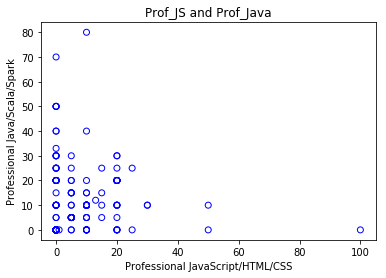

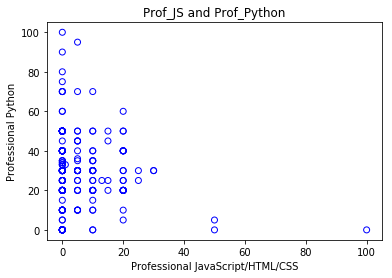

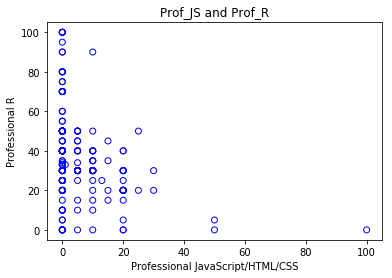

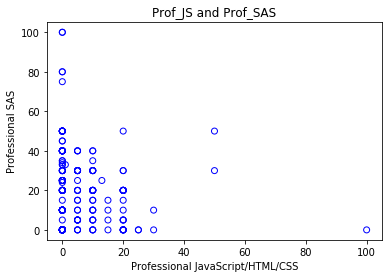

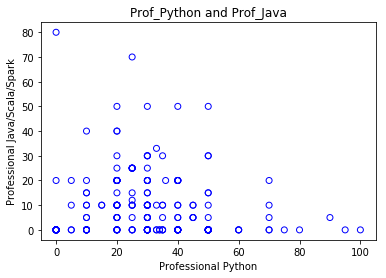

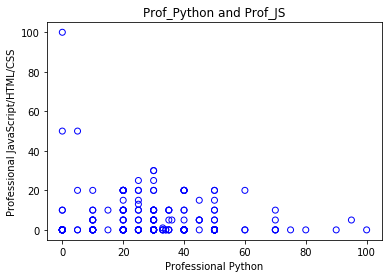

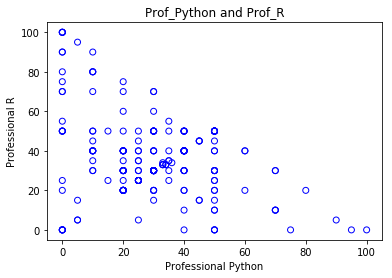

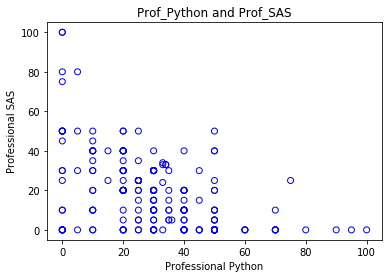

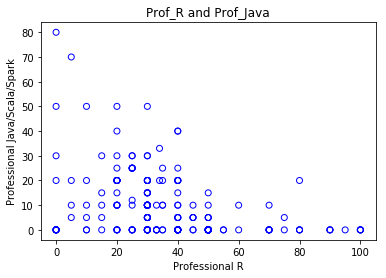

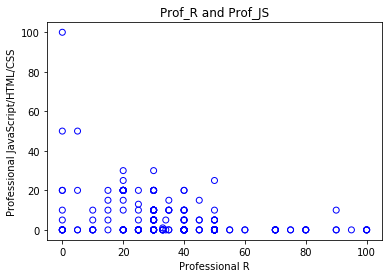

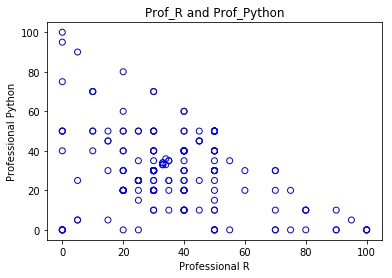

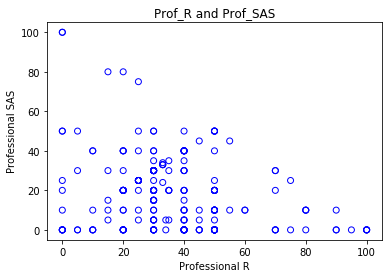

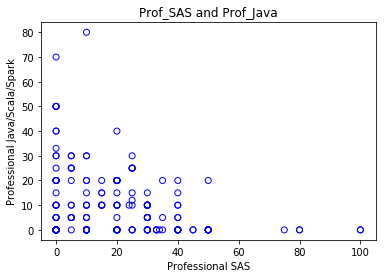

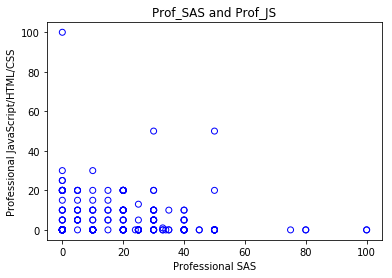

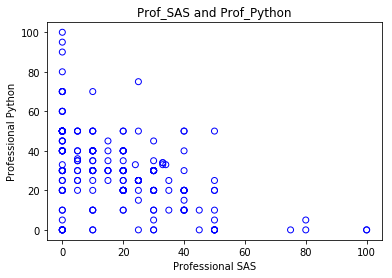

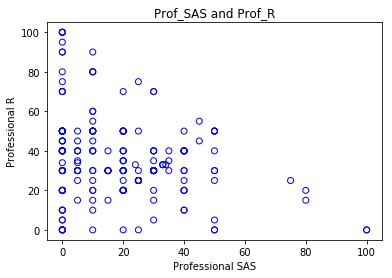

In [8]:
software_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]  

# Create a set of scatter plots for professional need
for i in range(5,10):
    for j in range(5,10):
        if i != j:
            file_title = software_df.columns[i] + '_and_' + software_df.columns[j]
            plot_title = software_df.columns[i] + ' and ' + software_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(software_df_labels[i])
            axis.set_ylabel(software_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(software_df[software_df.columns[i]], 
            software_df[software_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

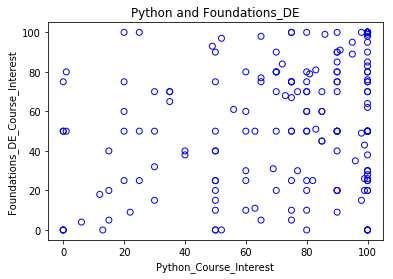

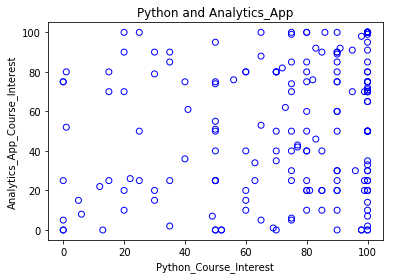

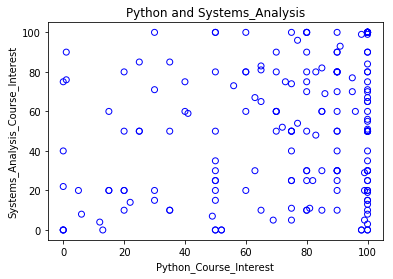

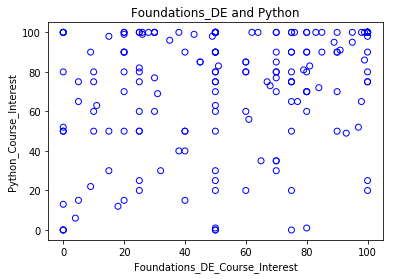

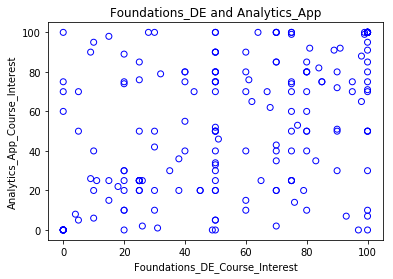

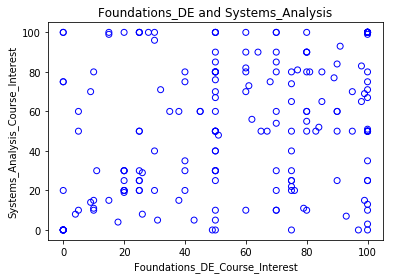

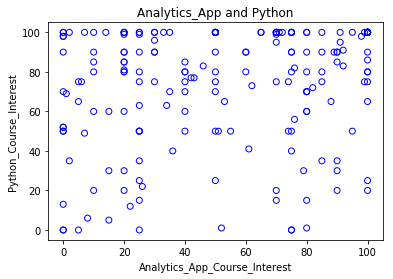

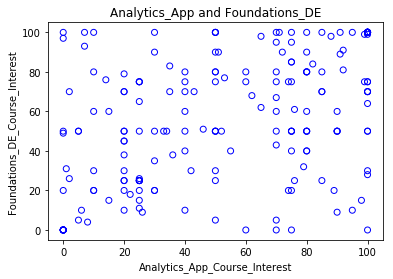

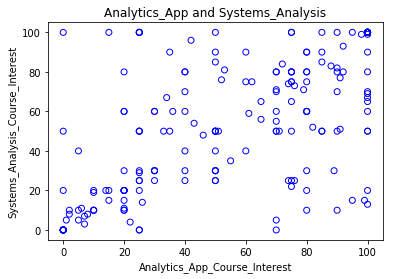

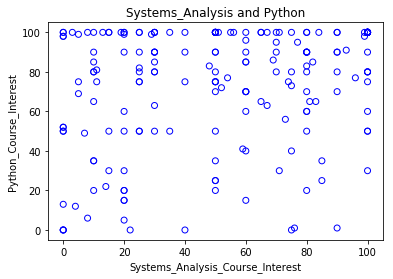

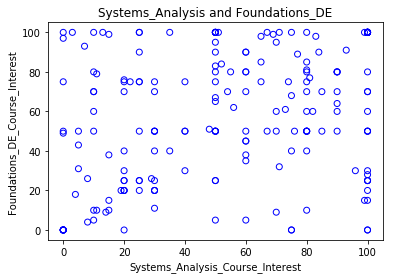

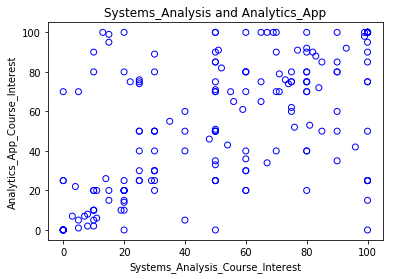

In [9]:
class_df_labels = [
    'Python_Course_Interest',
    'Foundations_DE_Course_Interest',
    'Analytics_App_Course_Interest',
    'Systems_Analysis_Course_Interest'     
] 


# Create a set of scatter plots for future Class Preference
for i in range(4):
    for j in range(4):
        if i != j:
            file_title = class_df.columns[i] + '_and_' + class_df.columns[j]
            plot_title = class_df.columns[i] + ' and ' + class_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(class_df_labels[i])
            axis.set_ylabel(class_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(class_df[class_df.columns[i]], 
            class_df[class_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)  

In [10]:
#Python and R appear to be the most desired. Want to look more closely if this holds true as one progresses through the program (completes courses)
survey_df.columns

Index(['My_Java', 'My_JS', 'My_Python', 'My_R', 'My_SAS', 'Prof_Java',
       'Prof_JS', 'Prof_Python', 'Prof_R', 'Prof_SAS', 'Ind_Java', 'Ind_JS',
       'Ind_Python', 'Ind_R', 'Ind_SAS', 'Python', 'Foundations_DE',
       'Analytics_App', 'Systems_Analysis', 'Courses_Completed', 'PREDICT400',
       'PREDICT401', 'PREDICT410', 'PREDICT411', 'PREDICT413', 'PREDICT420',
       'PREDICT422', 'PREDICT450', 'PREDICT451', 'PREDICT452', 'PREDICT453',
       'PREDICT454', 'PREDICT455', 'PREDICT456', 'PREDICT457', 'OtherPython',
       'OtherR', 'OtherSAS', 'Other', 'Graduate_Date'],
      dtype='object')

In [11]:
survey_df.Courses_Completed.value_counts()

2.0     25
5.0     24
7.0     24
10.0    20
6.0     16
9.0     14
3.0     13
4.0     13
8.0     11
11.0    11
12.0    10
1.0      6
Name: Courses_Completed, dtype: int64

<BarContainer object of 13 artists>

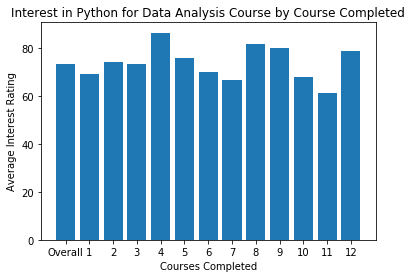

In [12]:
#I create a plot to see if the interest in the Pyhton Course is consistent across number of courses completed

averagescore = []
averagescore.append(survey_df['Python'].mean())

for i in range(1,13):
    averagescore.append(survey_df['Python'][survey_df['Courses_Completed']==i].mean())

coursescompleted=['Overall','1','2','3','4','5','6','7','8','9','10','11','12']

plt.title('Interest in Python for Data Analysis Course by Course Completed')
plt.xlabel('Courses Completed')
plt.ylabel('Average Interest Rating')
plt.bar(coursescompleted,averagescore)


The bar shows relatively steady interest with some fluctation but no clear pattern. This could be generalized to any class, preference as well.

<BarContainer object of 13 artists>

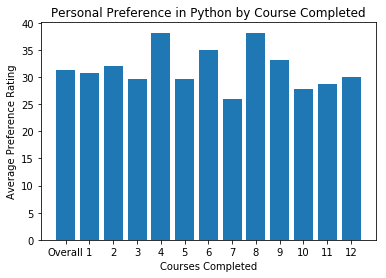

In [13]:
#I repeat to get a sense if personal preference for Python behaves the same way
averagescore = []
averagescore.append(survey_df['My_Python'].mean())

for i in range(1,13):
    averagescore.append(survey_df['My_Python'][survey_df['Courses_Completed']==i].mean())

coursescompleted=['Overall','1','2','3','4','5','6','7','8','9','10','11','12']

plt.title('Personal Preference in Python by Course Completed')
plt.xlabel('Courses Completed')
plt.ylabel('Average Preference Rating')
plt.bar(coursescompleted,averagescore)


In [14]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

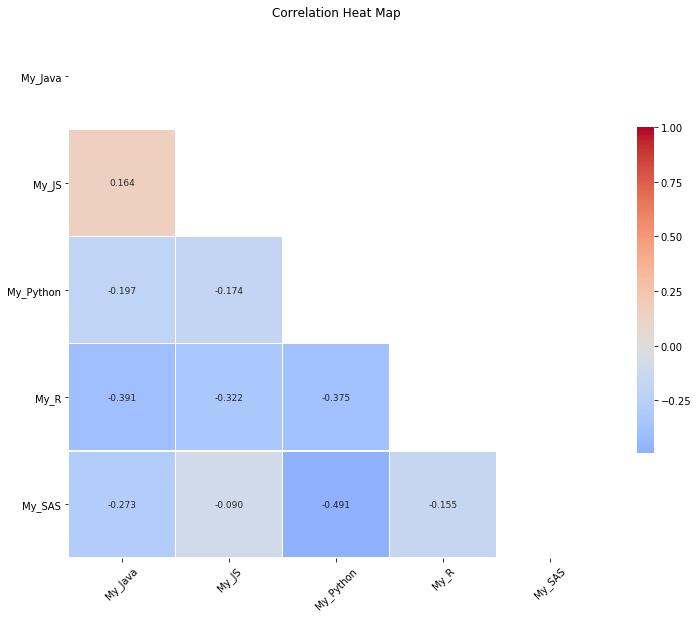

In [15]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df.loc[:,'My_Java':'My_SAS'])

<Figure size 432x288 with 0 Axes>

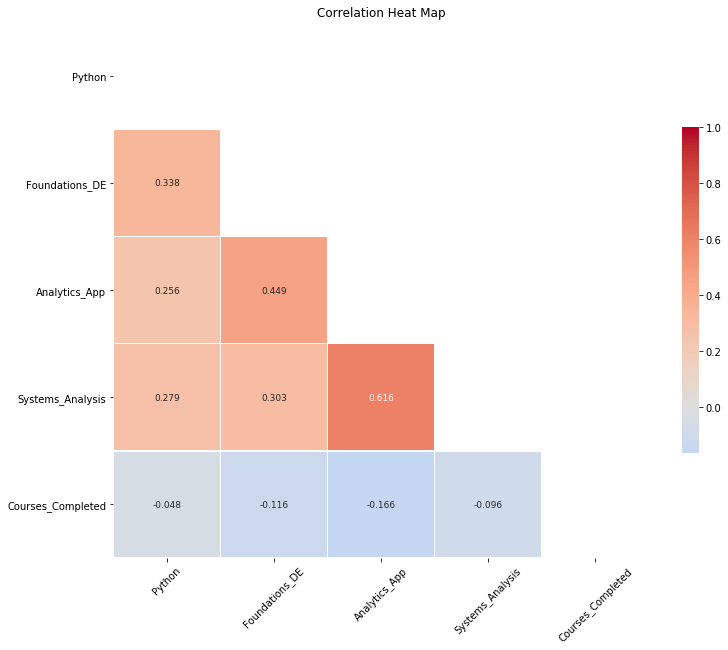

In [16]:
corr_chart(df_corr = survey_df.loc[:,'Python':'Courses_Completed']) 

I couldn't really determine exactly what was being asked with scaling. All numerical data except Courses Completed were all on the same scale and there was no real opportunity for any outliers to be affecting the data. This was the best I could come up with?

In [17]:
# transformations a la Scikit Learn
# documentation at http://scikit-learn.org/stable/auto_examples/
#                  preprocessing/plot_all_scaling.html#sphx-glr-auto-
#                  examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df.loc[:,['Python','Courses_Completed']].dropna()


C:\Users\nm179525\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


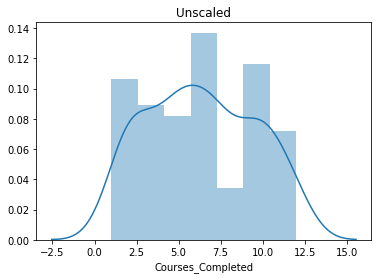

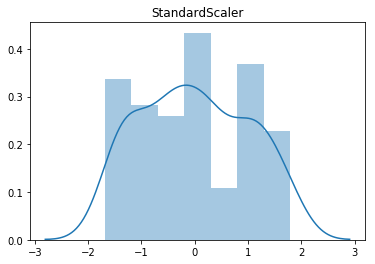

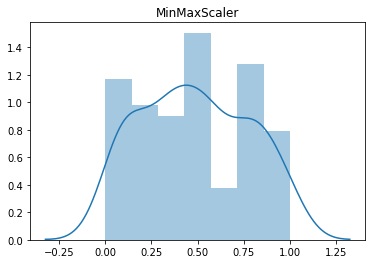

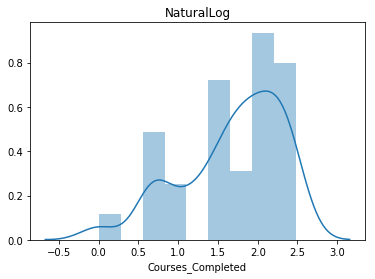

In [18]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X['Courses_Completed']).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)[:,1]).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)[:,1]).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X['Courses_Completed'])).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

The Courses Completed already is relatively normally distributed as seen in the Unscaled Histogram and the Standard and MinMax Scaler using the Python class interest as a scaler doesn't change this. The natural log, however, makes the distribution skewed right so is not likely to be a good transformation.

In [19]:
X.iloc[:,1].value_counts()

2.0     25
5.0     24
7.0     24
10.0    20
6.0     16
9.0     14
3.0     13
4.0     13
11.0    11
8.0     10
12.0    10
1.0      6
Name: Courses_Completed, dtype: int64

In [20]:
X = survey_df.loc[:,['My_Python','My_R']].dropna()

C:\Users\nm179525\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


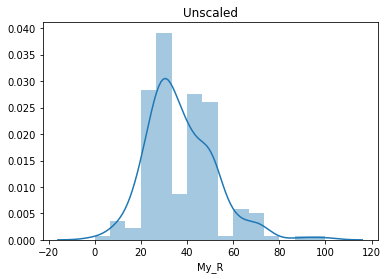

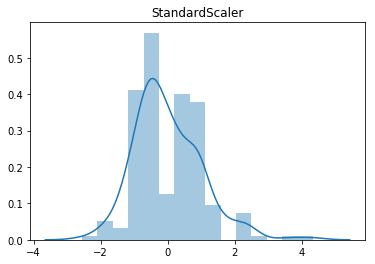

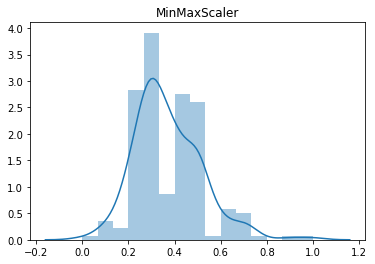

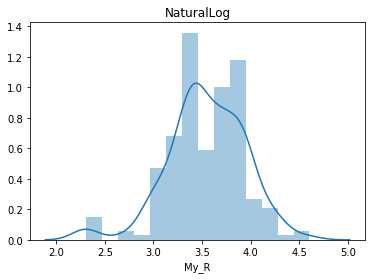

In [21]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X.iloc[:,1]).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)[:,1]).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)[:,1]).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X.iloc[:,1][X.iloc[:,1] != 0])).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

Here, we see the distribution not affeccted by Standard and MinMaxScaler suggesting no outliers and they could be used in analysis. The Natural log transformation, does appear to normal, so  log transformation for the interests might also be possible and desireable for futre analysis since it would make differences more pronounced though we would need a novel solution to deal with a preference of 0.